# Assignment 7 - Pandas II

This assigment demands the datas sets (realized jointly with this notebook):

- countries.csv
- gdp_per_capita_ppp.csv

__Question 1:__ (1.5 point) Read the file "gdp\_per\_capita\_ppp.csv" transforming it in a DataFrame with rows indexed by years and columns by the countries. Print the first 10 years (rows) and the five first countries (columns) in the generated dataframe.<br>
__Hint:__ Use the _transpose_ and _iloc_ operators.

In [8]:
# Solution for Question 1
import pandas as pd
import numpy as np
data = pd.read_csv("gdp_per_capita_ppp.csv", header=0, index_col=0)
data = data.transpose()
data.head()


GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Western Sahara,Vietnam,Virgin Islands (U.S.),Yemen Arab Republic (Former),Yemen Democratic (Former),"Yemen, Rep.",Yugoslavia,Zambia,Zimbabwe,Åland
1800,NaN,472.0535,NaN,601.215222,766.253664,674.453726,1260.123256,359.932582,775.668711,538.376199,...,NaN,459.708986,NaN,NaN,NaN,661.902376,NaN,364.464811,372.818337,NaN
1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.iloc[:10, :5]

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria
1800,NaN,472.0535,NaN,601.215222,766.253664
1801,NaN,NaN,NaN,NaN,NaN
1802,NaN,NaN,NaN,NaN,NaN
1803,NaN,NaN,NaN,NaN,NaN
1804,NaN,NaN,NaN,NaN,NaN
1805,NaN,NaN,NaN,NaN,NaN
1806,NaN,NaN,NaN,NaN,NaN
1807,NaN,NaN,NaN,NaN,NaN
1808,NaN,NaN,NaN,NaN,NaN
1809,NaN,NaN,NaN,NaN,NaN


***
__Question 2:__ (2.0 points) Graphically display the curve _year_ $\times$ _GDP_ for the three countries with the largest sum of GDP over the whole set of years. 

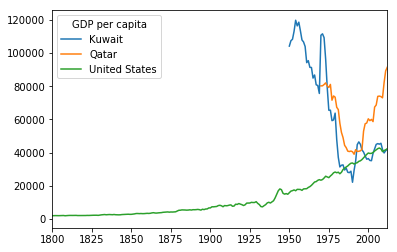

In [57]:
# Solution for Question 2
import matplotlib.pyplot as plt

top3 = np.sum(data).sort_values(ascending = False).iloc[:3].index
subdata = data[top3]
for c in subdata.columns:
    plt.plot(subdata.index, subdata[c])
plt.show()



***
__Question 3:__ (2.0 points) Print the name of all countries (if any) that contains no NaNs in their GDP series, that is, no missing data. Graphically display the series of those countries.

In [42]:
# Solution for Question 3
print(data.columns[data.describe().loc["count"] == data.shape[0]].values)

['Austria' 'Bangladesh' 'Belgium' 'China' 'Denmark' 'Finland' 'France'
 'Germany' 'Greece' 'India' 'Iran' 'Iraq' 'Ireland' 'Italy' 'Japan'
 'Korea, Dem. Rep.' 'Korea, Rep.' 'Myanmar' 'Netherlands' 'Norway'
 'Pakistan' 'Poland' 'Portugal' 'Spain' 'Sweden' 'Switzerland' 'Syria'
 'Taiwan' 'Turkey' 'United Kingdom' 'United States']


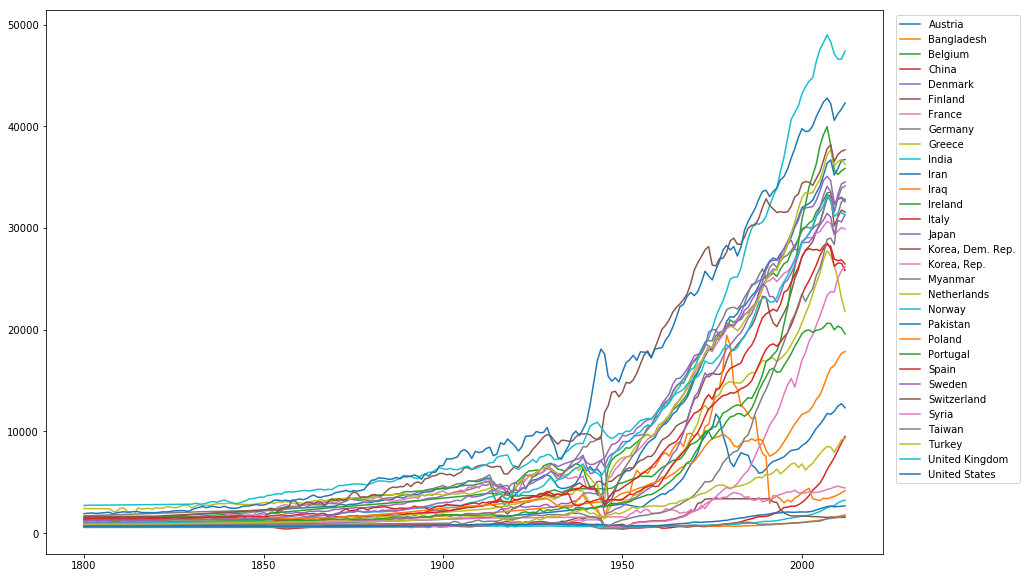

In [65]:
plt.figure(figsize=(15,10))
subdata2 = data[data.columns[data.describe().loc["count"] == data.shape[0]].values]
for c in subdata2.columns:
    plt.plot(subdata2.index, subdata2[c], label = c)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

***
__Question 4:__ (3.0 points) Read the file "countries.csv" and create a DataFrame with rows indexed by countries. The DataFrame must containing the columns "Life expectancy", "Population", and "Average GDP". This DataFrame should be a merge of proper columns from "countries.csv", with the column "Average GDP" computed from the DataFrame created in Question 1. Print the ten first rows from the created DataFrame.<br>
__Hint:__ Use pd.mean to generate the "Average GDP" column. Replace NaN by zero when computing the average value.

In [92]:
# Solution for Question 4
coun = pd.read_csv("countries.csv", sep=";", index_col=0)
coun = coun[["Life expectancy", "Population"]]
data = data.fillna(0)
avggdp = data.mean()
avggdp = pd.DataFrame({"Average GDP": avggdp})
coun = pd.merge(avggdp, coun, left_index=True, right_index=True)
coun.head(10)

,Average GDP,Life expectancy,Population
Afghanistan,253.178379,51.3,33332025
Egypt,968.800181,72.7,94666993
Albania,1070.687629,78.3,3038594
Algeria,1376.309984,76.8,40263711
American Samoa,288.560238,75.4,54194
Andorra,6122.977503,82.8,85660
Angola,1095.175787,56.0,20172332
Anguilla,2443.739395,81.4,16752
Antigua and Barbuda,2031.872558,76.5,93581
Equatorial Guinea,929.117090,64.2,759451


***
__Question 5:__ (1.5 points) Sort the DataFrame created in Question 4 in decreasing order acording to the column "Average GDP" and make a scatter plot of "Population" $\times$ "Life expectancy" for the 100 first countries in the sorted list. Apply the logarithm function to the column "Population" before generating the plot. Normalize the "Average GDP" and scale the plotted points according to the normalized "Average GDP". Your plot should be similar to the following one:
![title](dfscatter.png)

In [100]:
coun = coun.sort_values(by = "Average GDP", ascending=False)[:100]
coun['logpop'] = np.log(coun['Population'])
coun['normgdp'] = (coun['Average GDP'] - min(coun['Average GDP']))/(max(coun['Average GDP']) - min(coun['Average GDP']))

In [102]:
coun.describe()

,Average GDP,Life expectancy,Population,logpop,normgdp
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,5027.236336,76.436000,2.163650e+07,14.855832,0.194622
std,3242.461291,9.359266,4.560920e+07,2.635846,0.185701
min,1629.016792,0.000000,5.267000e+03,8.569216,0.000000
25%,2474.008245,74.900000,3.953665e+05,12.883505,0.048394
50%,3810.972394,77.550000,5.278238e+06,15.479100,0.124964
75%,6766.812538,80.925000,1.917020e+07,16.766326,0.294250
max,19089.673034,89.500000,3.239955e+08,19.596240,1.000000


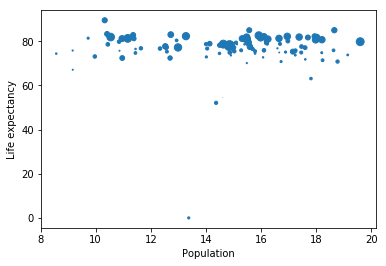

In [108]:
# Solution for Question 5
plt.scatter(coun['logpop'], coun['Life expectancy'], s = np.array(coun['normgdp'])*100)
plt.xlabel("Population")
plt.ylabel("Life expectancy")
plt.show()